# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [3]:
# Your code here. 
import pandas as pd
student_data = pd.DataFrame({'X': [17,51,27,21,36,48,19,26,54,30], 'Y': [10,1,5,9,4,2,9,6,0,3]})

,X,Y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

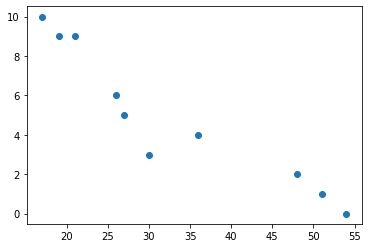

In [4]:
# Your code here.
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(student_data.X,student_data.Y)# donde X es la edad y Y es su retrasos


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

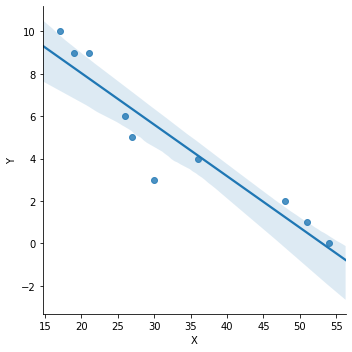

In [10]:
# Your response here. 
#Si hacemos una linea que se ajusta en los puntos podemos hacer una relación,
#Observamos una pendiente negativa, es decir podemos decir que entre más jovenes mayor retrasos.
import seaborn as sns
sns.lmplot(x='X',y='Y',data=student_data)

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [22]:
# Your response here.
import numpy as np
#----------CORRELACION---------------------------
print(student_data.corr())
#Los puntos se ubican cerca de la línea, lo que indica que existe una relación negativa fuerte entre las variables. 
#La relación es negativa porque a medida que una variable aumenta, la otra variable disminuye.
#---------COVARIANZA---------------------------
#los datos no están estandarizados en un rango de -1 a 1 como la correlacion, y de igual forma observamos un relacion 
# negativa entre X y Y
print(np.cov(student_data.X,student_data.Y))

          X         Y
X  1.000000 -0.939163
Y -0.939163  1.000000
[[187.65555556 -45.56666667]
 [-45.56666667  12.54444444]]


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

R-squared: 0.882027


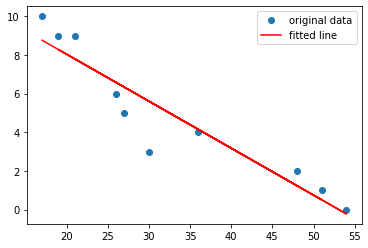

In [23]:
# Your response here.
from scipy import stats
x=student_data.X
y=student_data.Y
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("R-squared: %f" % r_value**2)
plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

Plot your regression model on your scatter plot.

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
# Your response here. 
#Como en la correlación, el coeficiente de determinación de R2 es de 0.88 casi igual al coeficiente de correlación por 
#lo que demuestra que hay una relación por lo que podemos concluir que  existe una relación funcional entre X y Y
#el en el sentido de que el conocimiento de las variables dependientes X(edad) determina completamente el valor que toma la variable respuesta Y(retardo)


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [26]:
# Import any libraries you may need & the data
vehicles=pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

Combined MPG              -0.926229
Year                      -0.222300
Cylinders                  0.752393
Fuel Cost/Year             0.930865
Fuel Barrels/Year          0.986189
CO2 Emission Grams/Mile    1.000000
Name: CO2 Emission Grams/Mile, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000220336E75C8>,
      dtype=object)

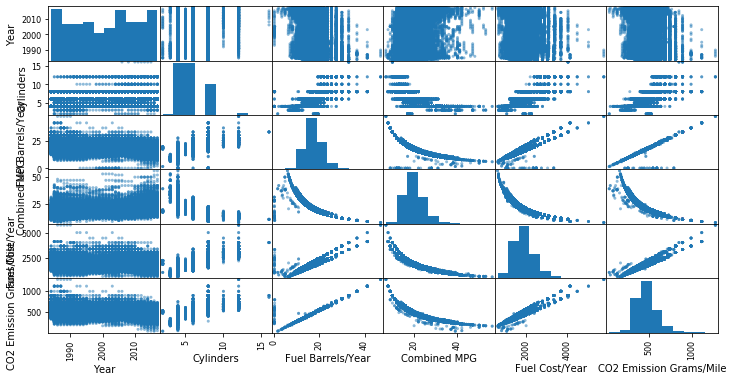

In [85]:
# Your response here. 
from matplotlib.patches import Rectangle 
import matplotlib.patches as patches


select_columns=vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year','CO2 Emission Grams/Mile']]
print(select_columns.corr()['CO2 Emission Grams/Mile'].sort_values())
#Observamos que las mejores correlacionadas son Combinesd MPG con una relación negativa y Fuel Barrels/Year, lo que tiene 
# sentido, podemos hacer una matriz de dispersión para visualizarlos
pd.plotting.scatter_matrix(select_columns,grid=True,figsize=(12,6))


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

Text(0.5, 1.0, 'Linear Regression for Fuel Barrels/Year and CO2 \n  Emissions Grams/Mile and R-squared: 0.972568')

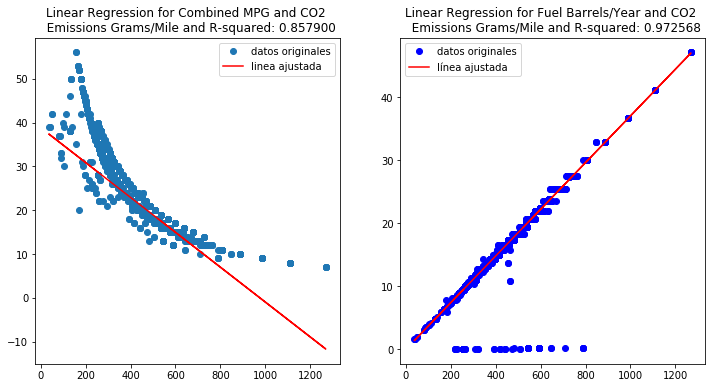

In [65]:
# Your response here. 
from scipy import stats
f, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True)

x=select_columns['CO2 Emission Grams/Mile']
y=select_columns['Combined MPG']
y1=select_columns['Fuel Barrels/Year']

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
axes[0].plot(x, y, 'o', label='datos originales')
axes[0].plot(x, intercept + slope*x, 'r', label='linea ajustada')
axes[0].legend()
axes[0].set_title('Linear Regression for Combined MPG and CO2 \n  Emissions Grams/Mile and'+ " R-squared: %f" % r_value**2)                 

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y1)
axes[1].plot(x, y1, 'bo', label='datos originales')
axes[1].plot(x, intercept + slope*x, 'r', label='línea ajustada')
axes[1].legend()
axes[1].set_title('Linear Regression for Fuel Barrels/Year and CO2 \n  Emissions Grams/Mile and'+ " R-squared: %f" % r_value**2)                 




Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [104]:
# Your code here. 
#Verificamos que tan linealmente es el dataframe
inviter_data = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,13]})

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

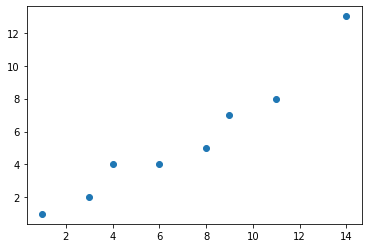

In [90]:
# Your code here.
plt.scatter(inviter_data.X, inviter_data.Y)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

R-squared: 0.931670


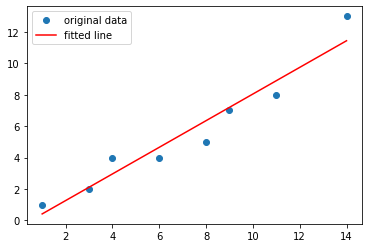

In [94]:
# Your response here. 
from scipy import stats
x=inviter_data.X
y=inviter_data.Y
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("R-squared: %f" % r_value**2)
plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

#Una R cuadrada de 0.93 lo que hay una relacion fuerte positiva entre mis datos por lo que seguramente, que entre más 
#tengas más dejaré de atender


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

R-squared: 0.943381


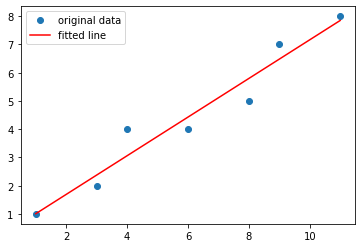

In [96]:
# Your response here. 
#sin outliers 
#P(14,13)
inviter_data_ = pd.DataFrame({'X': [1,3,4,6,8,9,11], 'Y': [1,2,4,4,5,7,8]})
from scipy import stats
x=inviter_data_.X
y=inviter_data_.Y
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("R-squared: %f" % r_value**2)
plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()
plt.show()


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

Mejora en la regresion sin outliers para R 0.0060


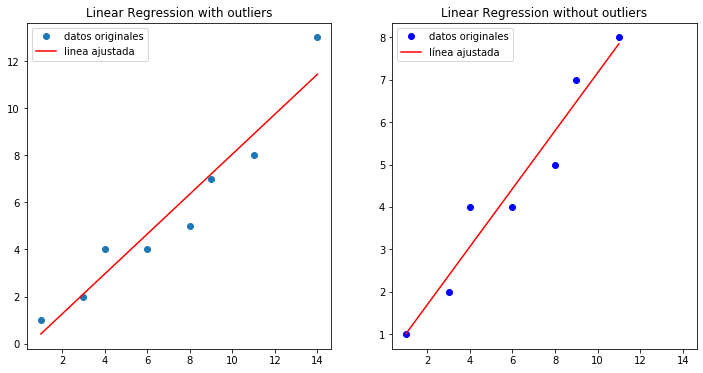

In [106]:
from scipy import stats
f, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True)
inviter_data_ = pd.DataFrame({'X': [1,3,4,6,8,9,11], 'Y': [1,2,4,4,5,7,8]})

x=inviter_data.X
y=inviter_data.Y
x1=inviter_data_.X
y1=inviter_data_.Y

def dif_regression(value1,value2):
                  dif=value2-value1
                  return dif


slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
axes[0].plot(x, y, 'o', label='datos originales')
axes[0].plot(x, intercept + slope*x, 'r', label='linea ajustada')
axes[0].legend()
axes[0].set_title('Linear Regression with outliers')                 

slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(x1, y1)
axes[1].plot(x1, y1, 'bo', label='datos originales')
axes[1].plot(x1, intercept2 + slope2*x1, 'r', label='línea ajustada')
axes[1].legend()
axes[1].set_title('Linear Regression without outliers' )                 

                  
print('Mejora en la regresion sin outliers para R', "{0:.4f}".format(dif_regression(r_value,r_value2)))     